# 1. Introduction

   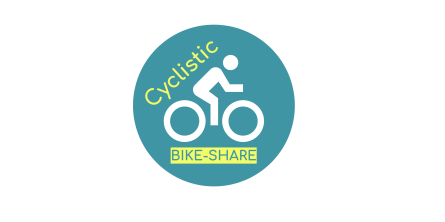


This case study is the ***capstone project*** of ***Google Data Analytics Professional Certification***.In this case study I am working as the a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago.

A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently.From the insights our team will design new marketing stratergy of converting the casual riders into anual riders.

There are 3 pricing plans :  single-ride passes, full-day passes,and annual memberships.
Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process :  **ask, prepare, process, analyze, share, and act.**



# 2. Ask

*** How do annual members and casual riders use Cyclistic bikes differently ?**

Stakeholders : 

1. **Lily Moreno**: The director of marketing.
2.**Cyclistic executive team**: The detail-oriented executive team.
3.**Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy.

***  At first Cyclistic executive team will decide whether to approve the recommended marketing program after the data insights and visualizations.**

*** Then from the insights our team will design new marketing stratergy of converting the casual riders into anual riders.**

# 3. Prepare

* Data I used is from [https://divvy-tripdata.s3.amazonaws.com/index.html](http://) to analyze and identify trends.The data from December 2021 to November 2022 is used for analysis.

* The data is stored in CSV format.There are 12 CSV files ,each file containing one month data.

* For the purposes of this case study,the datasets are appropriate.The data has been made available by Motivate International Inc. under this license [https://ride.divvybikes.com/data-license-agreement](http://)

* As this data is collected by a real bike sharing company in Chicago, there are no issues with bias or credibility. So its Reliable, Original, Current and Cited (as in ROCCC). I do not think its Comprehensive because this data lacks some information.

* As of data Integrity, its Accurate, Consistent and Trustworthy.

* data-privacy issues prohibit from using riders’ personally identifiable information. This means that we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes

# 4. Process

In [1]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the csv file for trip_data from December 2021 to November 2022

tripdata_2021_12 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202112-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_01 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202201-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_02 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202202-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_03 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202203-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_04 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202204-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_05 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202205-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_06 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202206-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_07 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202207-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_08 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202208-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_09 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202209-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_10 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202210-divvy-tripdata.csv",parse_dates=True)
tripdata_2022_11 = pd.read_csv("/kaggle/input/cyclistics-historical-trip-data-2021-2022/202211-divvy-tripdata.csv",parse_dates=True)

In [3]:
# Joining 12 CSV's into 1 and naming it as "tripdata_21_22".

tripdata_21_22 = pd.concat([tripdata_2021_12,tripdata_2022_01,tripdata_2022_02,tripdata_2022_03,tripdata_2022_04,tripdata_2022_05,tripdata_2022_06,
              tripdata_2022_07,tripdata_2022_08,tripdata_2022_09,tripdata_2022_10,tripdata_2022_11],ignore_index = True)

In [4]:
# Top 5 and bottom 5 rows of the dataframe "tripdata_21_22"

tripdata_21_22

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_weekday
0,46F8167220E4431F,electric_bike,07-12-2021 15:06,07-12-2021 15:13,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.854833,-87.663660,41.871969,-87.650965,member,0:07:35,3.0
1,73A77762838B32FD,electric_bike,11-12-2021 03:43,11-12-2021 04:10,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.894405,-87.632331,41.967968,-87.650001,casual,0:26:54,7.0
2,4CF42452054F59C5,electric_bike,15-12-2021 23:10,15-12-2021 23:23,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.899357,-87.648522,41.937582,-87.644098,member,0:12:46,4.0
3,3278BA87BF698339,classic_bike,26-12-2021 16:16,26-12-2021 16:30,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.899390,-87.648545,41.894877,-87.632326,member,0:14:43,1.0
4,6FF54232576A3B73,electric_bike,30-12-2021 11:31,30-12-2021 11:51,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.895579,-87.682024,41.931248,-87.644336,member,0:20:16,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733456,C349E243A9BAA6F7,electric_bike,25-11-2022 11:19,25-11-2022 11:31,Wabash Ave & Grand Ave,TA1307000117,NaN,NaN,41.891836,-87.626806,41.890000,-87.620000,member,0:11:58,6.0
5733457,B0B4E85DA43A9194,classic_bike,22-11-2022 16:57,22-11-2022 17:31,Franklin St & Jackson Blvd,TA1305000025,Sheffield Ave & Wrightwood Ave,TA1309000023,41.877708,-87.635321,41.928712,-87.653833,casual,0:33:36,3.0
5733458,8D148DD47B59530B,classic_bike,06-11-2022 13:04,06-11-2022 13:13,Michigan Ave & Ida B Wells Dr,TA1305000010,Shedd Aquarium,15544,41.876243,-87.624426,41.867226,-87.615355,casual,0:09:28,1.0
5733459,0D1170BA18FD33D1,classic_bike,06-11-2022 09:41,06-11-2022 15:17,Halsted St & 18th St,13099,Shedd Aquarium,15544,41.857506,-87.645991,41.867226,-87.615355,casual,5:35:48,1.0


# 4.1 Cleaning Process

In [5]:
# Checking for missing info

tripdata_21_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733461 entries, 0 to 5733460
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  start_weekday       float64
dtypes: float64(5), object(10)
memory usage: 656.1+ MB


In [6]:
# Converting the datatype of "started_at"

tripdata_21_22["started_at"] = pd.to_datetime(tripdata_21_22["started_at"],dayfirst=True)

In [7]:
# Converting the datatype of "ended_at"

tripdata_21_22["ended_at"] = pd.to_datetime(tripdata_21_22["ended_at"],dayfirst=True)

In [8]:
# Dropping the columns which are not relevant for analysis

tripdata_21_22.drop(columns = ["start_station_name","start_station_id","end_station_name","end_station_id","start_lat","start_lng",
                              "end_lat","end_lng","ride_length"],inplace = True)

In [9]:
# Added a new coulmn for the ride length

tripdata_21_22["ride_length"] = (tripdata_21_22["ended_at"] - tripdata_21_22["started_at"])/pd.Timedelta(minutes=1)

In [10]:
# Some of the rows in contains the negative value indication end_date is earlier than start_date

tripdata_21_22[tripdata_21_22['ride_length'] < 0].count()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
start_weekday    0
ride_length      0
dtype: int64

In [11]:
# Some of the rows contains values less than 60 seconds.They are potentially false starts or users trying to re-dock a bike to ensure it was secure.

tripdata_21_22[(tripdata_21_22['ride_length'] < 1) & (tripdata_21_22['ride_length'] >= 0)].count()

ride_id          70701
rideable_type    70701
started_at       70701
ended_at         70701
member_casual    70701
start_weekday    70701
ride_length      70701
dtype: int64

In [12]:
# Removing the rows where ride length is negative and less than 60 seconds.

tripdata_21_22 = tripdata_21_22[tripdata_21_22["ride_length"] >= 1]
tripdata_21_22 = tripdata_21_22.reset_index()
tripdata_21_22 = tripdata_21_22.drop(columns=['index'])

In [13]:
tripdata_21_22

,ride_id,rideable_type,started_at,ended_at,member_casual,start_weekday,ride_length
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:00,2021-12-07 15:13:00,member,3.0,7.0
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:00,2021-12-11 04:10:00,casual,7.0,27.0
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:00,2021-12-15 23:23:00,member,4.0,13.0
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:00,2021-12-26 16:30:00,member,1.0,14.0
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:00,2021-12-30 11:51:00,member,5.0,20.0
...,...,...,...,...,...,...,...
5662745,C349E243A9BAA6F7,electric_bike,2022-11-25 11:19:00,2022-11-25 11:31:00,member,6.0,12.0
5662746,B0B4E85DA43A9194,classic_bike,2022-11-22 16:57:00,2022-11-22 17:31:00,casual,3.0,34.0
5662747,8D148DD47B59530B,classic_bike,2022-11-06 13:04:00,2022-11-06 13:13:00,casual,1.0,9.0
5662748,0D1170BA18FD33D1,classic_bike,2022-11-06 09:41:00,2022-11-06 15:17:00,casual,1.0,336.0


In [14]:
# Checking for missing values

tripdata_21_22.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
start_weekday    0
ride_length      0
dtype: int64

# 5. Analyze And Share

In [15]:
# Extracting the year from start_date and creating a column

tripdata_21_22['year'] = tripdata_21_22['started_at'].dt.year

In [16]:
# Extracting the month from start_date and creating a column

tripdata_21_22['month'] = tripdata_21_22['started_at'].dt.month_name()

In [17]:
# Extracting the day of a week from start_date and creating a column

tripdata_21_22['day_of_week'] = tripdata_21_22['started_at'].dt.day_name()

In [18]:
# Extracting the hour from start_date and creating a column

tripdata_21_22['hour'] = tripdata_21_22['started_at'].dt.hour

In [19]:
# Changing the datatype

tripdata_21_22 = tripdata_21_22.astype({'year':'int16', 'hour':'int8'})

In [20]:
tripdata_21_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662750 entries, 0 to 5662749
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   start_weekday  float64       
 6   ride_length    float64       
 7   year           int16         
 8   month          object        
 9   day_of_week    object        
 10  hour           int8          
dtypes: datetime64[ns](2), float64(2), int16(1), int8(1), object(5)
memory usage: 405.0+ MB


In [21]:
tripdata_21_22.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,start_weekday,ride_length,year,month,day_of_week,hour
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:00,2021-12-07 15:13:00,member,3.0,7.0,2021,December,Tuesday,15
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:00,2021-12-11 04:10:00,casual,7.0,27.0,2021,December,Saturday,3
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:00,2021-12-15 23:23:00,member,4.0,13.0,2021,December,Wednesday,23
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:00,2021-12-26 16:30:00,member,1.0,14.0,2021,December,Sunday,16
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:00,2021-12-30 11:51:00,member,5.0,20.0,2021,December,Thursday,11


# 5.1  Analyzing Rideable Type Usage Between Casual riders and Members.

In [22]:
#Setting the style for the chart

sns.set_style("darkgrid")

In [23]:
tripdata_21_22.pivot_table(
    index = ["rideable_type","member_casual"],
    values = "ride_id",
    aggfunc = ["count"],
    margins = True,
    margins_name = "Total_count"
)

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          891390
              member         1713862
docked_bike   casual          179553
electric_bike casual         1248129
              member         1629816
Total_count                  5662750

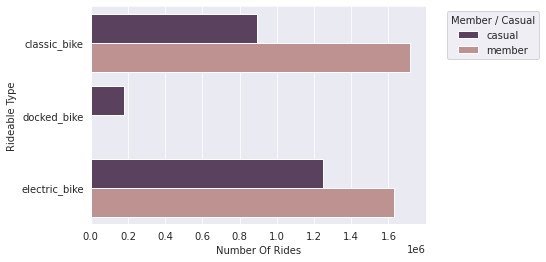

In [24]:
plot_1 = tripdata_21_22.groupby(["member_casual","rideable_type"],as_index = False).count()

sns.barplot(data=plot_1, 
            x='ride_id',
            y='rideable_type',
            hue="member_casual",
            palette='magma',
            saturation = .3)
plt.xlabel("Number Of Rides",size = 10)
plt.ylabel("Rideable Type",size = 10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* **Most** of the **members and casual riders** use **classic bike and electric bike**.
* Only **few casual riders use docked bike**

# 5.2  Analysing The Number Of Rides Between Casual Riders And Members

# 5.2.1 Total Number Of Rides in a year

In [25]:
pd.pivot_table(tripdata_21_22,
               index = 'member_casual',
               values = 'ride_id',
               aggfunc = ['count'],
               margins = True,
               margins_name = 'total_count'
)

,count
,ride_id
member_casual,
casual,2319072
member,3343678
total_count,5662750


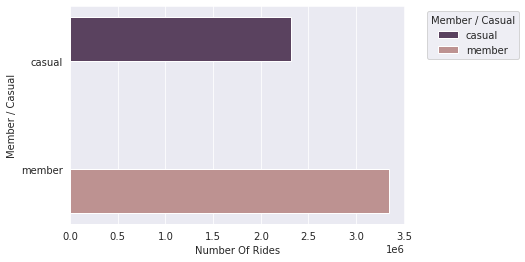

In [26]:
plot_2 = tripdata_21_22.groupby(['member_casual'], as_index=False).count()

sns.barplot(data=plot_2, 
            x='ride_id',
            y='member_casual',
            hue="member_casual",
            palette='magma',
            saturation = .3,
            orient='h')
plt.xlabel("Number Of Rides",size = 10)
plt.ylabel("Member / Casual",size = 10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

# 5.2.2.  Total Number Of Rides In A Month

In [27]:
pd.pivot_table(tripdata_21_22,
               index = ['year','month','member_casual'],
               values = 'ride_id',
               aggfunc = ['count'],
               margins = True,
               margins_name = 'total_count'
)

count
                                     ride_id
year        month     member_casual         
2021        December  casual           69135
                      member          176040
2022        April     casual          124949
                      member          241700
            August    casual          354444
                      member          421318
            February  casual           21110
                      member           92845
            January   casual           18259
                      member           84361
            July      casual          401256
                      member          411964
            June      casual          364917
                      member          395188
            March     casual           88938
                      member          191997
            May       casual          277229
                      member          350155
            November  casual           99399
                      member          233819
            October   casual          206254
                      member          344838
            September casual          293182
                      member          399453
total_count                          5662750

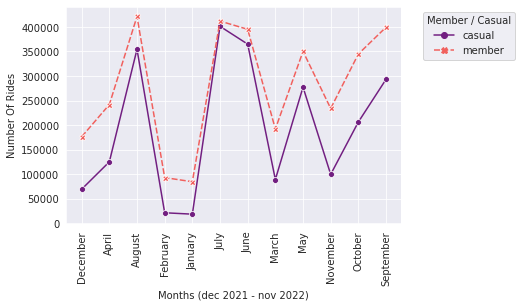

In [28]:
plot_3 = tripdata_21_22.groupby(['year','month','member_casual'],as_index = False).count()

sns.lineplot(data=plot_3, 
            x='month',
            y='ride_id',
            hue="member_casual",
            palette='magma',
            style = "member_casual",
            markers=True
           )
plt.xlabel("Months (dec 2021 - nov 2022)",size = 10)
plt.ylabel("Number Of Rides",size = 10)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* This shows that total number of rides **fall during winter season and rise during summer season**.
* Same trend is observed for both casual riders and members.
* **Maximum riders** are using bikes in **summer**.

# 5.2.3.  Total Number Of Rides Each Weekday

In [29]:
pd.pivot_table(tripdata_21_22,
               index = ['day_of_week','member_casual'],
               values = 'ride_id',
               aggfunc = ['count'],
               margins = True,
               margins_name = 'total_count'
)

count
                           ride_id
day_of_week member_casual         
Friday      casual          336476
            member          470895
Monday      casual          277223
            member          471093
Saturday    casual          470881
            member          439383
Sunday      casual          387426
            member          385223
Thursday    casual          310111
            member          533659
Tuesday     casual          260855
            member          512409
Wednesday   casual          276100
            member          531016
total_count                5662750

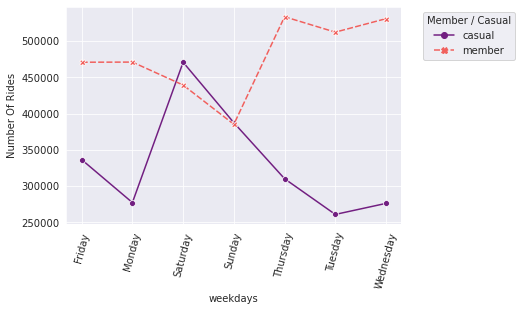

In [30]:
plot_4 = tripdata_21_22.groupby(['day_of_week','member_casual'],as_index = False).count()

sns.lineplot(data=plot_4, 
            x='day_of_week',
            y='ride_id',
            hue="member_casual",
            palette='magma',
            style = "member_casual",
            markers=True
           )
plt.xlabel("weekdays",size = 10)
plt.ylabel("Number Of Rides",size = 10)
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* This shows that **members** are using bike on **weekdays**.may be using for commuting.
* Most **Casual riders** are using bike during **Weekends** (saturday and sunday).
* **Casual riders** **overtake** members on **weekends**.

# 5.2.4.  Total Number Of Hides Per Hour

In [31]:
pd.pivot_table(tripdata_21_22,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           46207
            member           35844
1           casual           30061
            member           22088
2           casual           18716
            member           12756
3           casual           11074
            member            7945
4           casual            7635
            member            8904
5           casual           12424
            member           32508
6           casual           29197
            member           90641
7           casual           51194
            member          171852
8           casual           69247
            member          203860
9           casual           72137
            member          144308
10          casual           93277
            member          136320
11          casual          121589
            member          163177
12          casual          144660
            member          188497
13          casual          150881
            member          187451
14          casual          160495
            member          185979
15          casual          178137
            member          222140
16          casual          197463
            member          291409
17          casual          219271
            member          348111
18          casual          196774
            member          283839
19          casual          150780
            member          205289
20          casual          111491
            member          144321
21          casual           95485
            member          112914
22          casual           86403
            member           86714
23          casual           64474
            member           56811
Total Count                5662750

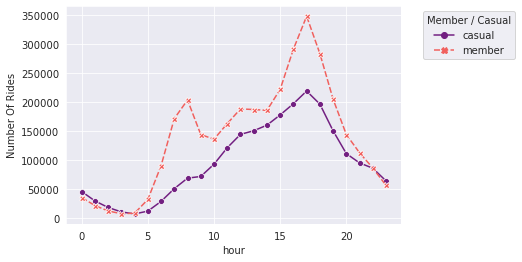

In [32]:
plot_5 = tripdata_21_22.groupby(['hour','member_casual'],as_index = False).count()

sns.lineplot(data=plot_5, 
            x='hour',
            y='ride_id',
            hue="member_casual",
            palette='magma',
            style = "member_casual",
            markers=True
           )
plt.xlabel("hour",size = 10)
plt.ylabel("Number Of Rides",size = 10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* In a day, **casual riders and members** use bike **more during afternoon and peak use during evening**.
* In the **morning time**,the number of **casual riders are less than members**.This may be because **members use for commuting**.

# 5.3  Analyzing Average Ride Length Between Casual riders and Members.

# 5.3.1.  Average Ride Length in 1 Year

In [33]:
pd.pivot_table(tripdata_21_22,
               index = ['member_casual'],
               values = 'ride_length',
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Avg_ride_length'
  )

,mean
,ride_length
member_casual,
casual,29.458475
member,12.875459
Avg_ride_length,19.666719


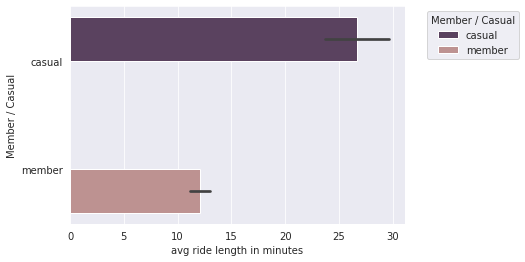

In [34]:
plot_6 = tripdata_21_22.groupby(['year','member_casual'],as_index = False).mean()

sns.barplot(data=plot_6, 
            x='ride_length',
            y='member_casual',
            hue="member_casual",
            palette='magma',
            saturation = .3,
            orient='h')
plt.xlabel("avg ride length in minutes",size = 10)
plt.ylabel("Member / Casual",size = 10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* Average ride length of **casual riders are more than twice the members**.

# 5.3.2.  Average Ride Length In Month 

In [35]:
tripdata_21_22.groupby(["month","member_casual"])[["ride_length"]].mean()

ride_length
month     member_casual             
April     casual           29.880823
          member           11.640182
August    casual           29.680026
          member           13.565502
December  casual           23.699414
          member           11.114730
February  casual           27.095879
          member           11.571285
January   casual           30.806561
          member           12.108960
July      casual           29.627667
          member           13.900834
June      casual           32.465451
          member           14.175365
March     casual           32.969900
          member           12.093147
May       casual           31.225792
          member           13.531168
November  casual           21.599936
          member           11.284819
October   casual           26.740083
          member           12.127170
September casual           28.320910
          member           13.170824

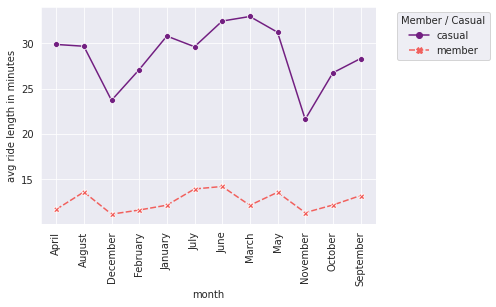

In [36]:
plot_7 = tripdata_21_22.groupby(["month","member_casual"],as_index = False).mean()

sns.lineplot(data=plot_7, 
            x='month',
            y='ride_length',
            hue="member_casual",
            palette='magma',
            style = "member_casual",
            markers=True
           )
plt.xlabel("month",size = 10)
plt.ylabel("avg ride length in minutes",size = 10)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()
         

* Average ride length of **casual riders are more than twice the members**.
* Average ride length of rides **fall during winter season and rise during summer season**.

# 5.3.3.  Average Ride Length Each Weekday

In [37]:
tripdata_21_22.groupby(["day_of_week","member_casual"])[["ride_length"]].mean()

ride_length
day_of_week member_casual             
Friday      casual           28.120333
            member           12.661162
Monday      casual           29.574242
            member           12.424925
Saturday    casual           32.928009
            member           14.346249
Sunday      casual           34.498482
            member           14.241229
Thursday    casual           25.872317
            member           12.454395
Tuesday     casual           26.299143
            member           12.296761
Wednesday   casual           24.996418
            member           12.238987

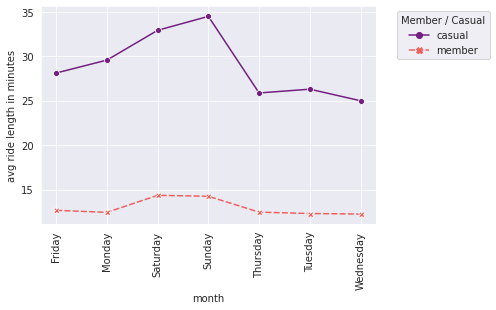

In [38]:
plot_8 = tripdata_21_22.groupby(["day_of_week","member_casual"],as_index = False).mean()

sns.lineplot(data=plot_8, 
            x='day_of_week',
            y='ride_length',
            hue="member_casual",
            palette='magma',
            style = "member_casual",
            markers=True
           )
plt.xlabel("month",size = 10)
plt.ylabel("avg ride length in minutes",size = 10)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* In Weekends **casual riders** ride length is **maximum when compared to Weekdays**.
* **Members** ride length tend to be almost same in all **Weekdays and marginally higher in Weekends**.
* Both **Casual riders and Members** use bikes for **long rides during Weekends**.

# 5.3.4. Average Ride Length Each Hour 

In [39]:
tripdata_21_22.groupby(["hour","member_casual"])[["ride_length"]].mean()

ride_length
hour member_casual             
0    casual           30.859805
     member           13.276922
1    casual           38.502977
     member           13.511862
2    casual           41.916221
     member           13.112104
3    casual           41.565288
     member           13.325739
4    casual           38.763720
     member           13.393531
5    casual           29.082341
     member           10.782823
6    casual           24.276672
     member           11.392681
7    casual           19.947924
     member           11.860037
8    casual           20.748509
     member           11.627087
9    casual           26.015429
     member           11.714285
10   casual           32.324088
     member           12.625528
11   casual           32.221895
     member           12.983135
12   casual           31.330942
     member           12.616185
13   casual           31.445782
     member           12.695174
14   casual           31.639328
     member           13.129870
15   casual           31.893638
     member           13.181831
16   casual           29.211285
     member           13.456300
17   casual           26.465616
     member           13.717418
18   casual           27.901267
     member           13.457414
19   casual           29.655312
     member           13.266390
20   casual           28.640043
     member           13.061238
21   casual           28.209782
     member           12.856457
22   casual           26.839577
     member           12.799179
23   casual           32.253063
     member           13.179701

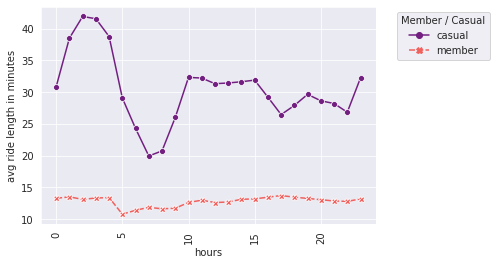

In [40]:
plot_9 = tripdata_21_22.groupby(["hour","member_casual"],as_index = False).mean()

sns.lineplot(data=plot_9, 
            x='hour',
            y='ride_length',
            hue="member_casual",
            palette='magma',
            style = "member_casual",
            markers=True
           )
plt.xlabel("hours",size = 10)
plt.ylabel("avg ride length in minutes",size = 10)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Member / Casual')
plt.show()

* **Members** ride length tend to be almost same in all **through out a day**
* **Casual riders** ride length tend to be in **peak during afternoon and night** .

# 6.  ACT

# 6.1  Conclusion

* Annual members and Casual riders use Cyclistic bike share differently.

* The **average ride length** of **casual riders** are more than **twice** as of **members**.

* From the average ride length difference, we can conclude that **Annual members** usually use bike share for **daily commuting**, while **casual riders** mostly use bike share for **leisure rides mostly during Weekends**.

* There are a **fixed number of casual riders** who use bike share for **commuting**.

# 6.2  Recommendations

* A new **Annual Membership** package for **Weekend** usage only will attract current **Weekend casual riders**.
* A seasonal membership option for **casual rider** which mostly ride on **May - October** only
* Promotional offers for **ride length extension** on membership for **casual riders**.

# 6.3 Further discussion

1. This case study have not include the information for fee for casual ride/member ride and its relationship with ride length.

With the fee information it would help to explore the potenial reasons why a rider would choose casual option over member option if the rider is a

* Seasonal rider
* Weekend rider
* Long trip rider

2. If the personally identifiable information and financial information were available, I could have calculated whether the casual riders had spent more money than if they opt for taking annual memberships.